In [2]:
%matplotlib inline

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
import pydotplus
from sklearn import tree
from IPython.display import Image

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

print("Librerie importate con successo.")

Librerie importate con successo.


In [3]:
df = pd.read_csv(r"C:\Users\Mario\Desktop\UniPi\2° semestre\DM2\progetto\merged_echo.csv", index_col=0, header=[0,1])

In [4]:
df.head()

audio_features                                                    \
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   

                                             track  
         speechiness    tempo   valence popularity  
track_id                                            
2           0.159310  165.922  0.576661          0  
3           0.461818  126.957  0.269240          0  
5           0.124595  100.260  0.621661          0  
10          0.032985  111.562  0.963590          1  
134         0.525519  114.290  0.894072          0

In [5]:
df.shape

(13129, 9)

In [6]:
df.columns

MultiIndex([('audio_features',     'acousticness'),
            ('audio_features',     'danceability'),
            ('audio_features',           'energy'),
            ('audio_features', 'instrumentalness'),
            ('audio_features',         'liveness'),
            ('audio_features',      'speechiness'),
            ('audio_features',            'tempo'),
            ('audio_features',          'valence'),
            (         'track',       'popularity')],
           )

In [7]:
# Tolgo la colonna tempo
df = df[[col for col in df.columns if col != ('audio_features','tempo')]]
df.columns

MultiIndex([('audio_features',     'acousticness'),
            ('audio_features',     'danceability'),
            ('audio_features',           'energy'),
            ('audio_features', 'instrumentalness'),
            ('audio_features',         'liveness'),
            ('audio_features',      'speechiness'),
            ('audio_features',          'valence'),
            (         'track',       'popularity')],
           )

# KNN

In [8]:
class_name = ('track','popularity')

In [9]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [10]:
X_train.shape, X_test.shape

((9190, 7), (3939, 7))

In [11]:
'''
uniform_accuracy = list()
distance_accuracy = list()
errore_accurary = list()

uniform_f1 = list()
distance_f1 = list()
errore_f1 = list()

for n in range(1, 30, 3):
    for w in ["uniform", "distance"]:
        print("n_neighbors:", n, "weights:" , w)
        clf = KNeighborsClassifier(n_neighbors=n, weights=w)

        scores = cross_val_score(clf, X, y, cv=10)
        print('Accuracy: %0.4f (+/- %0.2f)'%(scores.mean(), scores.std()*2))

        if w == "uniform":
            uniform_accuracy.append(scores.mean())
        else:
            distance_accuracy.append(scores.mean())

        
        scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
        print('F1-score: %0.4f (+/- %0.2f)'%(scores.mean(), scores.std()*2))
        print()
        
        if w == "uniform":
            uniform_f1.append(scores.mean())
        else:
            distance_f1.append(scores.mean())

plt.plot(range(1, 30, 3), uniform_accuracy, label="uniform")
plt.plot(range(1, 30, 3), distance_accuracy, label="distance")
plt.legend(title="Weights")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

plt.plot(range(1, 30, 3), uniform_f1, label="uniform")
plt.plot(range(1, 30, 3), distance_f1, label="distance")
plt.legend(title="Weights")
plt.xlabel("Number of neighbors")
plt.ylabel("F1-score")
plt.show()
'''

'\nuniform_accuracy = list()\ndistance_accuracy = list()\nerrore_accurary = list()\n\nuniform_f1 = list()\ndistance_f1 = list()\nerrore_f1 = list()\n\nfor n in range(1, 30, 3):\n    for w in ["uniform", "distance"]:\n        print("n_neighbors:", n, "weights:" , w)\n        clf = KNeighborsClassifier(n_neighbors=n, weights=w)\n\n        scores = cross_val_score(clf, X, y, cv=10)\n        print(\'Accuracy: %0.4f (+/- %0.2f)\'%(scores.mean(), scores.std()*2))\n\n        if w == "uniform":\n            uniform_accuracy.append(scores.mean())\n        else:\n            distance_accuracy.append(scores.mean())\n\n        \n        scores = cross_val_score(clf, X, y, cv=10, scoring=\'f1_macro\')\n        print(\'F1-score: %0.4f (+/- %0.2f)\'%(scores.mean(), scores.std()*2))\n        print()\n        \n        if w == "uniform":\n            uniform_f1.append(scores.mean())\n        else:\n            distance_f1.append(scores.mean())\n\nplt.plot(range(1, 30, 3), uniform_accuracy, label="unifo

In [12]:
#valutiamo cosa succede all'errore al variare di k , CON uniform e ECUCLEDIAN
error = []
#calcoliamo l'errore per K che varia tra 1 e 40
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i, weights="uniform", metric="euclidean")
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

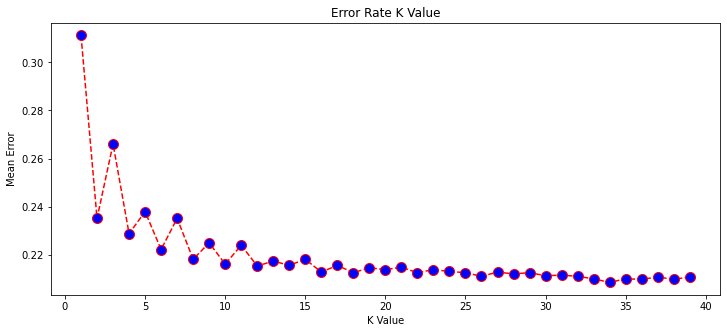

In [13]:
plt.figure(figsize=(12,5))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')

plt.xlabel('K Value')
plt.ylabel('Mean Error')

plt.show()

In [14]:
clf = KNeighborsClassifier(n_neighbors=10, weights='uniform')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.783955318608784
F1-score [0.87629016 0.14814815]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      3098
           1       0.47      0.09      0.15       841

    accuracy                           0.78      3939
   macro avg       0.63      0.53      0.51      3939
weighted avg       0.73      0.78      0.72      3939



### Grafici <u>prima</u> di imabalanced learning

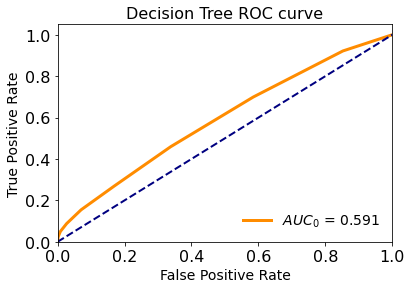

In [176]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Decision Tree ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

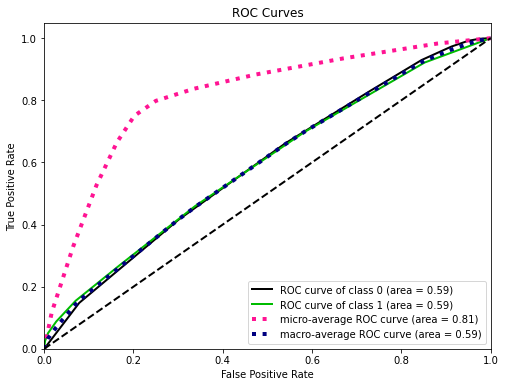

In [177]:
plot_roc(y_test, y_score, figsize=(8,6))
plt.show()

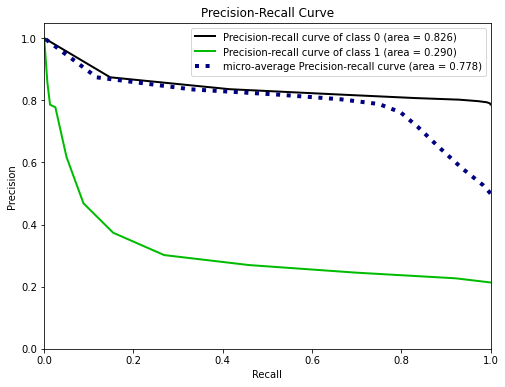

In [178]:
plot_precision_recall(y_test, y_score, figsize=(8,6))
plt.show()

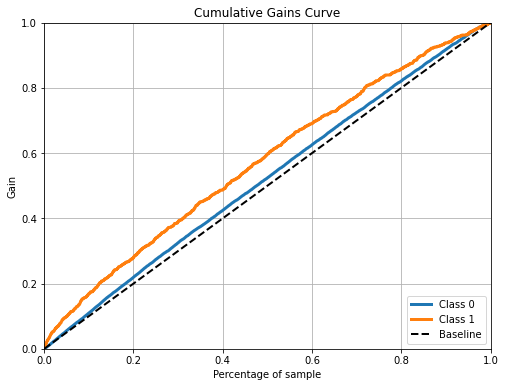

In [179]:
plot_cumulative_gain(y_test, y_score, figsize=(8,6))
plt.show()

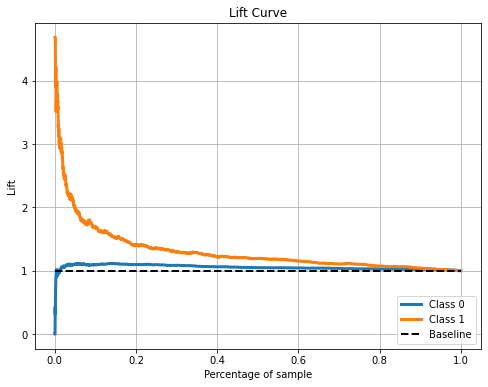

In [180]:
plot_lift_curve(y_test, y_score, figsize=(8,6))
plt.show()

# ALGORITMI IMBALANCED LEARNING

In [181]:
# Installazione della libreria imblearn: conda install -c conda-forge imbalanced-learn

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

### Random Undersampling

In [182]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 7228, 1: 7228})


Accuracy 0.5986290936785986
F1-score [0.7139497 0.3275202]
              precision    recall  f1-score   support

           0       0.81      0.64      0.71      3098
           1       0.25      0.46      0.33       841

    accuracy                           0.60      3939
   macro avg       0.53      0.55      0.52      3939
weighted avg       0.69      0.60      0.63      3939



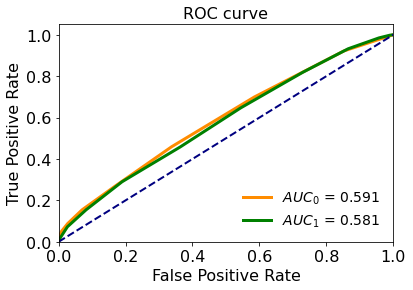

In [183]:
clf.fit(X_rus, y_rus)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

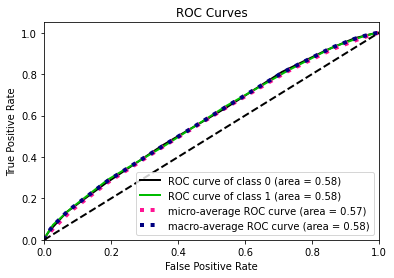

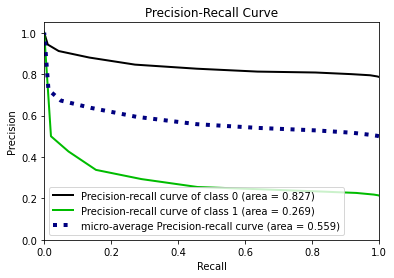

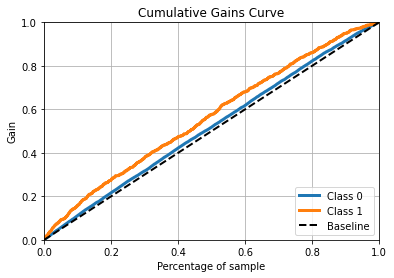

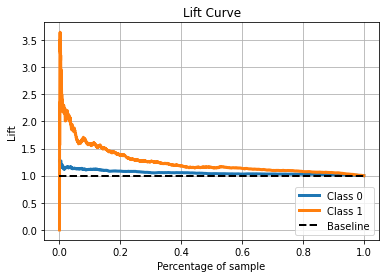

In [184]:
plot_roc(y_test, y_score)
plot_precision_recall(y_test, y_score)
plot_cumulative_gain(y_test, y_score)
plot_lift_curve(y_test, y_score)

plt.show()

### CondensedNearestNeighbour

Condensed nearest neighbor (CNN, the Hart algorithm) is an algorithm designed to reduce the data set for k-NN classification. It selects the set of prototypes U from the training data, such that 1NN with U can classify the examples almost as accurately as 1NN does with the whole data set.

In [185]:
import warnings
warnings.simplefilter("ignore")

In [186]:
'''

cnn = CondensedNearestNeighbour(random_state=42, n_jobs=-1)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

'''

"\n\ncnn = CondensedNearestNeighbour(random_state=42, n_jobs=-1)\nX_res, y_res = cnn.fit_resample(X_train, y_train)\nprint('Resampled dataset shape %s' % Counter(y_res))\n\n"

In [187]:
'''

clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

'''

'\n\nclf.fit(X_res, y_res)\n\ny_pred = clf.predict(X_test)\n\nprint(\'Accuracy %s\' % accuracy_score(y_test, y_pred))\nprint(\'F1-score %s\' % f1_score(y_test, y_pred, average=None))\nprint(classification_report(y_test, y_pred))\n\ny_score = clf.predict_proba(X_test)\nfpr, tpr, _ = roc_curve(y_test, y_score[:, 1])\nroc_auc = auc(fpr, tpr)\n\nplt.plot(fpr0, tpr0, color=\'darkorange\', lw=3, label=\'$AUC_0$ = %.3f\' % (roc_auc0))\nplt.plot(fpr, tpr, color=\'green\', lw=3, label=\'$AUC_1$ = %.3f\' % (roc_auc))\n\nplt.plot([0, 1], [0, 1], color=\'navy\', lw=2, linestyle=\'--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\', fontsize=16)\nplt.ylabel(\'True Positive Rate\', fontsize=16)\nplt.title(\'ROC curve\', fontsize=16)\nplt.legend(loc="lower right", fontsize=14, frameon=False)\nplt.tick_params(axis=\'both\', which=\'major\', labelsize=16)\nplt.show()\n\n'

In [188]:
'''

plot_roc(y_test, y_score)
plot_precision_recall(y_test, y_score)
plot_cumulative_gain(y_test, y_score)
plot_lift_curve(y_test, y_score)

plt.show()

'''

'\n\nplot_roc(y_test, y_score)\nplot_precision_recall(y_test, y_score)\nplot_cumulative_gain(y_test, y_score)\nplot_lift_curve(y_test, y_score)\n\nplt.show()\n\n'

### Random Oversampling

In [189]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 7228, 1: 7228})


Accuracy 0.605991368367606
F1-score [0.7198556  0.33618477]
              precision    recall  f1-score   support

           0       0.82      0.64      0.72      3098
           1       0.26      0.47      0.34       841

    accuracy                           0.61      3939
   macro avg       0.54      0.56      0.53      3939
weighted avg       0.70      0.61      0.64      3939



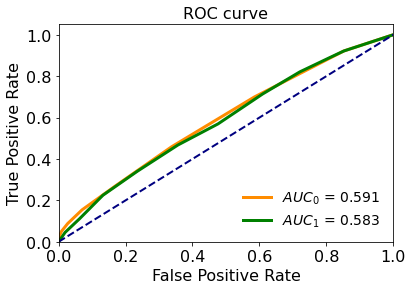

In [190]:
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

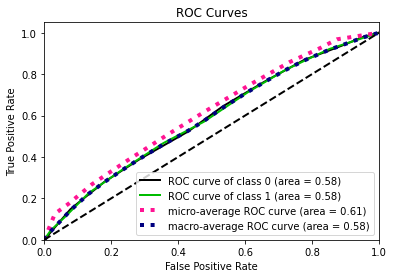

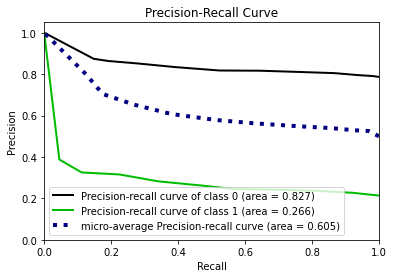

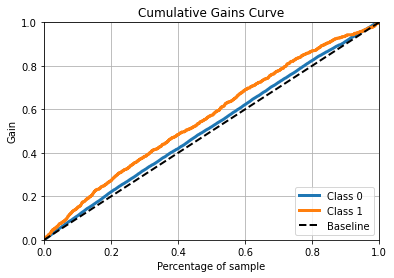

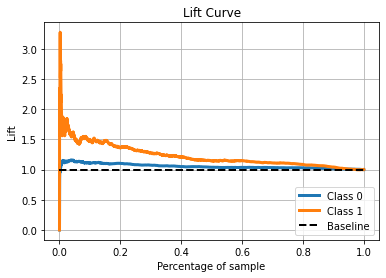

In [191]:
plot_roc(y_test, y_score)
plot_precision_recall(y_test, y_score)
plot_cumulative_gain(y_test, y_score)
plot_lift_curve(y_test, y_score)

plt.show()

### SMOTE

In [192]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 7228, 1: 7228})


Accuracy 0.6125920284336126
F1-score [0.72504505 0.34450172]
              precision    recall  f1-score   support

           0       0.82      0.65      0.73      3098
           1       0.27      0.48      0.34       841

    accuracy                           0.61      3939
   macro avg       0.55      0.56      0.53      3939
weighted avg       0.70      0.61      0.64      3939



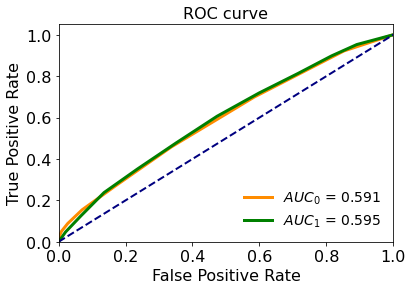

In [193]:
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

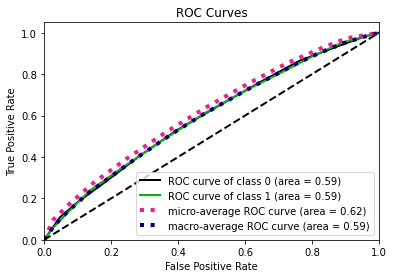

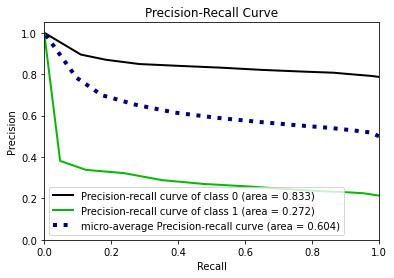

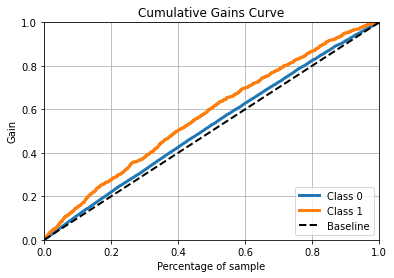

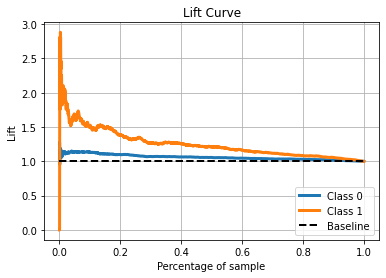

In [194]:
plot_roc(y_test, y_score)
plot_precision_recall(y_test, y_score)
plot_cumulative_gain(y_test, y_score)
plot_lift_curve(y_test, y_score)

plt.show()